In [55]:
import numpy as np
import pandas as pd
import umap
from keras.datasets import mnist
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import LocallyLinearEmbedding
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', size=22)

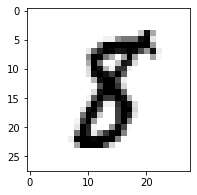

The above digit is 8


In [15]:
# Loading the MNIST dataset
(X_raw, y), (X_test_raw, y_test) = mnist.load_data()

#display or plot a number
plt.figure(figsize =(3,3))
idx=125

#converting the data point with index as idx into a numpy array of size 28 * 28
grid_data = X_raw[idx]
plt.imshow(grid_data, interpolation ='none',cmap='binary')
plt.show()
print('The above digit is ' + str(y[idx]))


# PCA

In [48]:

# Scaling
sts = StandardScaler()

X = sts.fit_transform(X_raw.reshape(X_raw.shape[0], -1))
X_test = sts.transform(X_test_raw.reshape(X_test_raw.shape[0], -1))


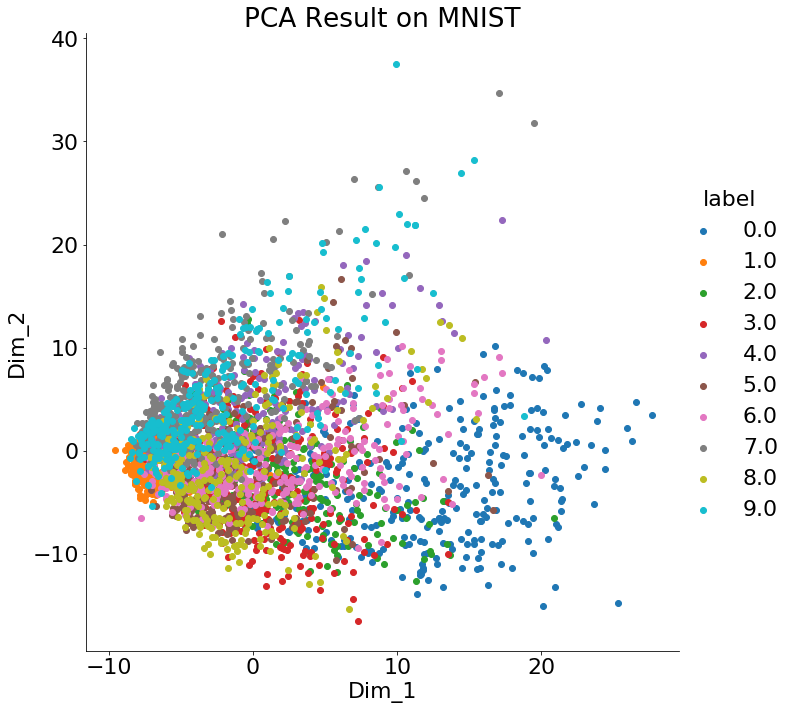

In [49]:
X_sample = X[3000:6000,:]
y_sample = y[3000:6000]

pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_sample)
pca_data = np.vstack((pca_data.T, y_sample)).T
pca_df = pd.DataFrame(data=pca_data, columns=('Dim_1 Dim_2 label'.split(" ")))

# plotting the result
sns.FacetGrid(pca_df, hue='label', height=10).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('PCA Result on MNIST')
plt.show()

# Kernel PCA

In [74]:
sts = StandardScaler()

X = sts.fit_transform(X_raw.reshape(X_raw.shape[0], -1))
X_test = sts.transform(X_test_raw.reshape(X_test_raw.shape[0], -1))

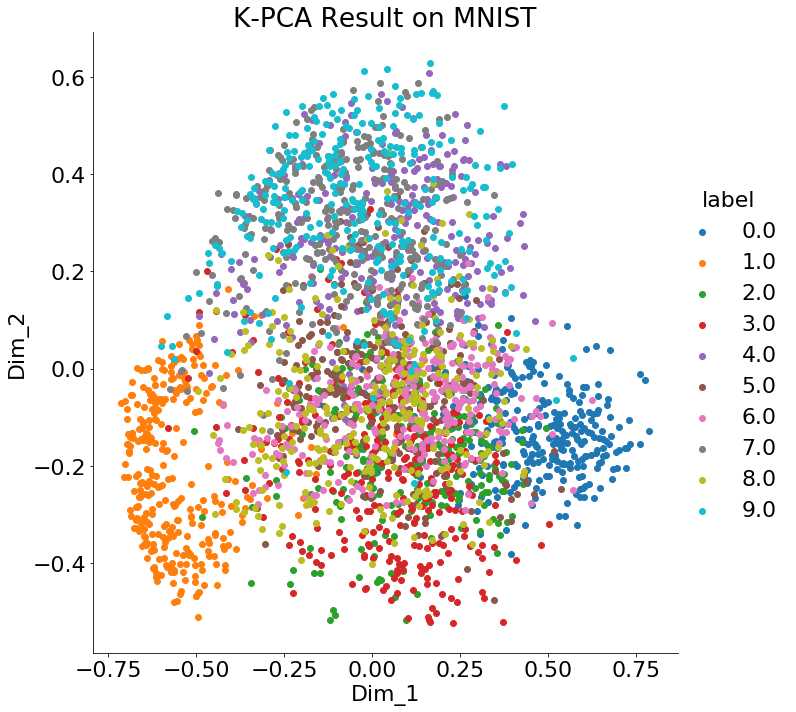

In [75]:
X_sample = X[3000:6000,:]
y_sample = y[3000:6000]

kpca = KernelPCA(n_components=2, kernel='cosine')
kpca_data = kpca.fit_transform(X_sample)
kpca_data = np.vstack((kpca_data.T, y_sample)).T
kpca_df = pd.DataFrame(data=kpca_data, columns=('Dim_1 Dim_2 label'.split(" ")))

# plotting the result
sns.FacetGrid(kpca_df, hue='label', height=10).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('K-PCA Result on MNIST')
plt.show()

# Locally Linear Embedding

In [58]:
X = X_raw.reshape(X_raw.shape[0], -1) / 255
X_test = X_test_raw.reshape(X_test_raw.shape[0], -1) / 255

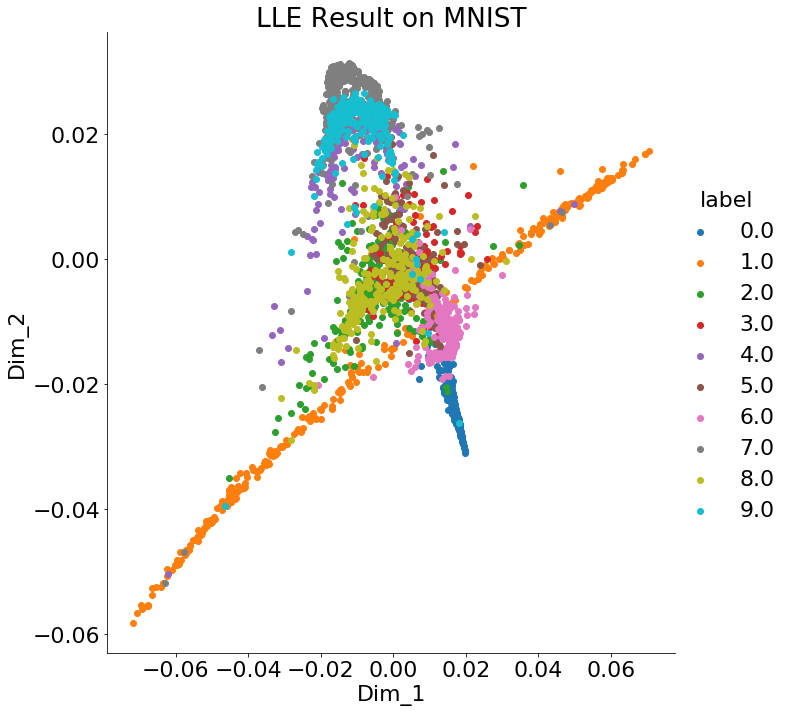

In [70]:

X_sample = X[3000:6000,:]
y_sample = y[3000:6000]

lle = LocallyLinearEmbedding(n_neighbors=10, n_components=2)
lle_data = lle.fit_transform(X_sample)
lle_data = np.vstack((lle_data.T, y_sample)).T
lle_df = pd.DataFrame(data=lle_data, columns=('Dim_1 Dim_2 label'.split(" ")))

# plotting the result
sns.FacetGrid(lle_df, hue='label', height=10).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('LLE Result on MNIST')
plt.show()


# TSNE

In [62]:

X = X_raw.reshape(X_raw.shape[0], -1) / 255
X_test = X_test_raw.reshape(X_test_raw.shape[0], -1) / 255


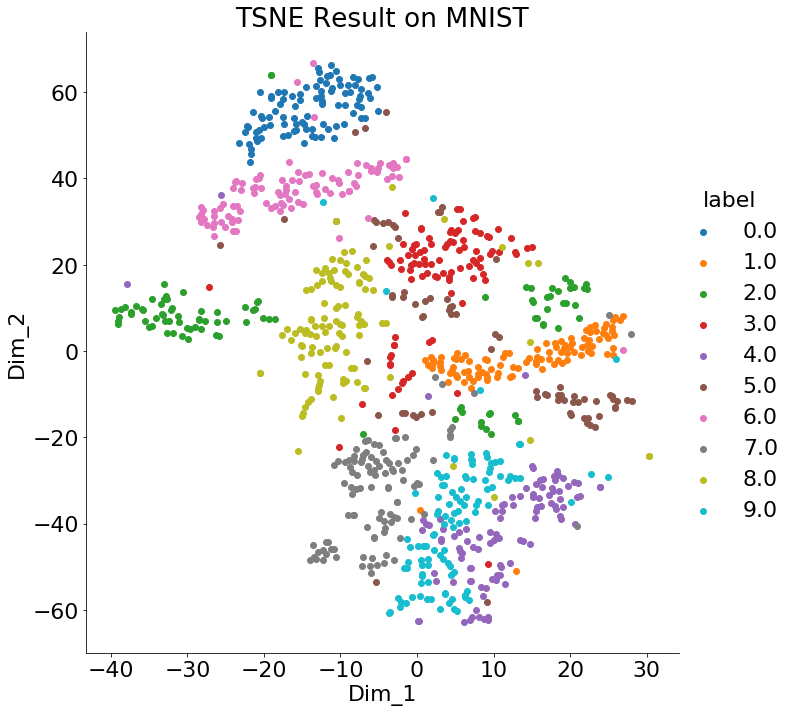

In [63]:
# TSNE

# Picking samples for TSNE
X_sample = X[3000:4000,:]
y_sample = y[3000:4000]

tsne = TSNE(n_components=2, random_state=0)
tsne_data = tsne.fit_transform(X_sample)
tsne_data = np.vstack((tsne_data.T, y_sample)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=('Dim_1 Dim_2 label'.split(" ")))

# plotting the results
sns.FacetGrid(tsne_df, hue='label', height=10).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('TSNE Result on MNIST')
plt.show()


# UMAP

In [71]:
X = X_raw.reshape(X_raw.shape[0], -1) / 255
X_test = X_test_raw.reshape(X_test_raw.shape[0], -1) / 255

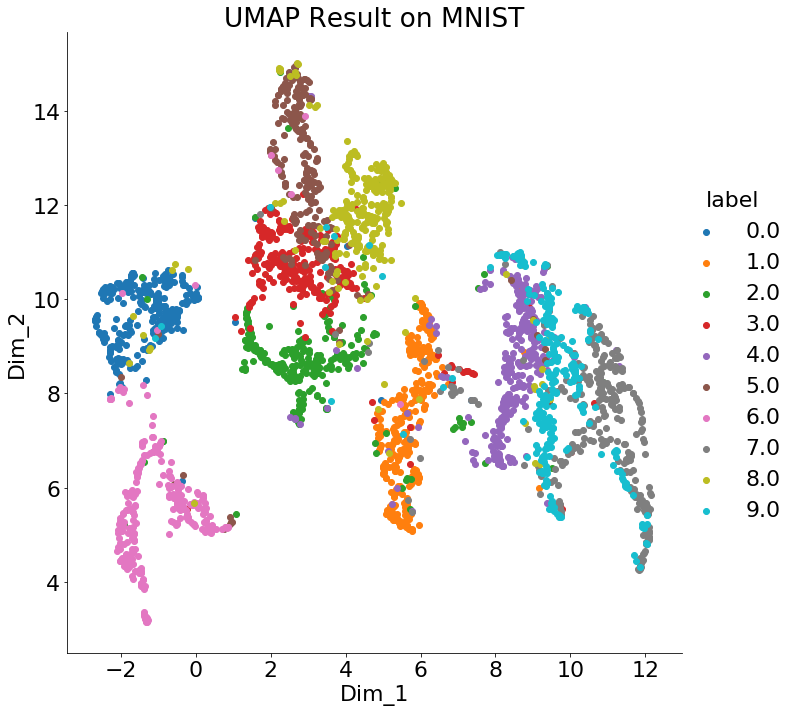

In [83]:
X_sample = X[1000:4000,:]
y_sample = y[1000:4000]

ump = umap.UMAP(n_neighbors=10, n_components=2)
ump_data = ump.fit_transform(X_sample)
ump_data = np.vstack((ump_data.T, y_sample)).T
ump_df = pd.DataFrame(data=ump_data, columns=('Dim_1 Dim_2 label'.split(" ")))

# plotting the result
sns.FacetGrid(ump_df, hue='label', height=10).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('UMAP Result on MNIST')
plt.show()